In [1]:
!pip install pandas scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [3]:
import pandas as pd

# Load the CSV
df = pd.read_csv('crop_yield.csv')
print(df.head())
print(df.info())

   Fertilizer  temp     N     P     K  yeild
0        80.0  28.0  80.0  24.0  20.0   12.0
1        77.0  27.0  78.0  23.0  20.0   12.0
2        80.0  26.0  80.0  24.0  20.0   12.0
3        80.0  28.0  80.0  24.0  20.0   12.0
4        78.0  27.0  78.0  23.0  19.0   12.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fertilizer  2596 non-null   float64
 1   temp        2596 non-null   float64
 2   N           2596 non-null   float64
 3   P           2596 non-null   float64
 4   K           2596 non-null   float64
 5   yeild       2596 non-null   float64
dtypes: float64(6)
memory usage: 121.8 KB
None


In [14]:
yield_column = 'yeild'  # Use the actual name from df.columns

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop(yield_column, axis=1)
y = df[yield_column]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.1221718608190776
R² Score: 0.9911818632031804


Matplotlib is building the font cache; this may take a moment.


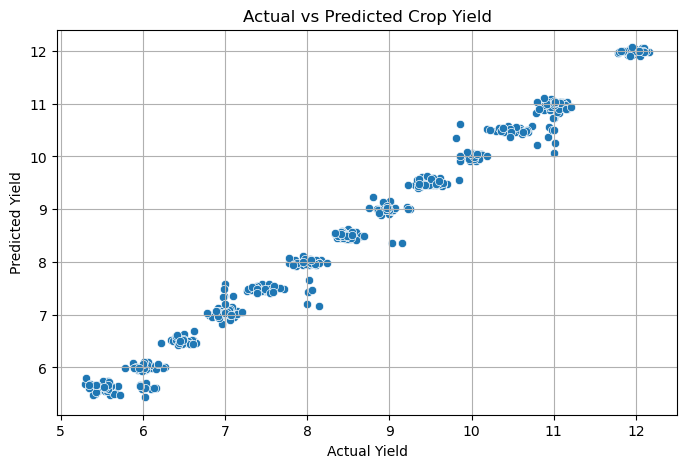

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.grid(True)
plt.show()

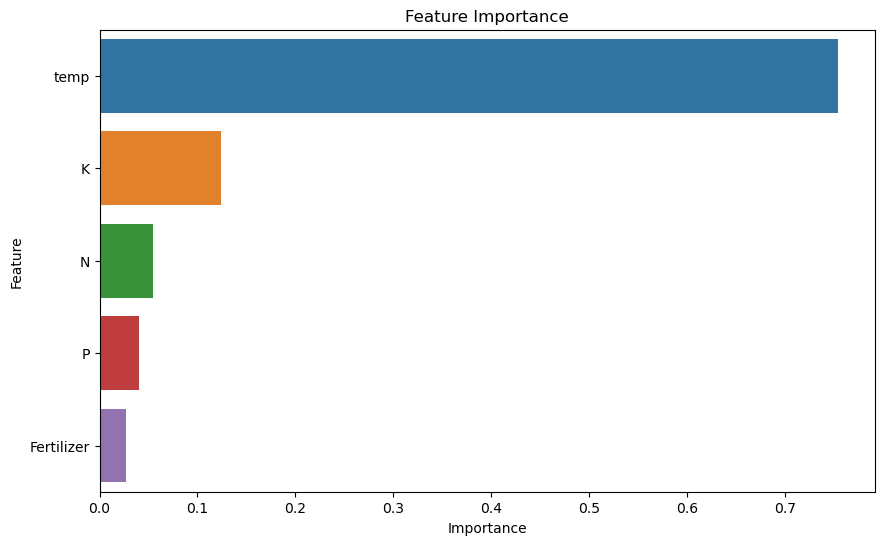

In [18]:
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()